Her er jeres første rigtige opgave! I skal lave bruge [yfinance](https://mercantec.notion.site/yfinance-8f05decbf9a040659da38616e432ed62?pvs=4) også kaldet Yahoo Finance, til at trække data ned på jeres yndlingsaktie! I skal herfra lave en regressionsmodel på dataet. Det involvere at splitte dataet op i træningsdata og testdata.
Nedenunder er der lige et code-snippet til at få jer startet!

Vi skal bruge følgende pakker til at starte vores projekt, en del af dem kender I. Pandas fra første dag, datetime har i nok arbejdet med lignende pakker før. [yfinance](https://mercantec.notion.site/yfinance-8f05decbf9a040659da38616e432ed62?pvs=4) er den som er linket til ovenfor og har alt det data vi skal bruge. Til sidste er der matplitlib, den er ikke strengt nødvendig for vores projekt, men det hjælper ofte at få et visuelt billede på! Dokumentation kan findes [her](https://mercantec.notion.site/MatPlotLib-bb10bec44c8e4bc28ac511017dbc895d?pvs=4)

In [75]:
import yfinance as yf
import pandas as pd
from datetime import date, timedelta
from matplotlib import pyplot as plt

Vi bruger datetime pakken til at sætte et startspunkt og et slutpunkt. Startspunktet er for 365 dage siden og slutpunktet er for 2 dage siden!

In [76]:
Start = date.today() - timedelta(365)
Start.strftime('%Y-%m-%d')

End = date.today() + timedelta(2)
End.strftime('%Y-%m-%d')

'2024-01-12'

Vi laver en funktion som tager en "ticker" ind, altså en aktie.
Her bruger vi så Pandas, pd, til at en dataframe som indeholder vores data omkring den valgte ticker, med slut og startsdato som definere før.

In [77]:
def closing_price(ticker):
    Asset = pd.DataFrame(yf.download(ticker, start=Start,
      end=End))
    return Asset

Nu kan vi bruge vores funktion til at se på vores data. Her bruger vi Microsoft aktien, MSFT. Standarten er at vi for dato, åbningsprisen, højeste og laveste på dagen, lukke prisen og den justerede lukkepris. Vi kan så bruge matplotlib

In [ ]:
microsoft = closing_price('MSFT')
print(microsoft)
plt.plot(microsoft['Adj Close'])
plt.show()

# Opgaven

Opgaven går nu på at I skal bruge jeres viden omkring regression på at lave en model som kan forudsige hvad aktie prisen bliver over den næste periode eller forhåbenligt bare en retning.

Det er ikke målet at I skal finde en model som gør det, men at I skal lege rundt med det. De værktøjer som vi har fået indtil videre, er ikke nok til at kunne lave en model som har noget grundlag. Det data vi for er heller ikke nok.

I kan tage inspiration ud fra dokumenterne her [regression](https://github.com/MAGS-Template/MachineLearning/blob/main/1.%20Regression/1.%20regression.ipynb) og [regression med data](https://github.com/MAGS-Template/MachineLearning/blob/main/1.%20Regression/2.%20regression_with_data.ipynb) - det er filerne i samme mappe som den her!


In [150]:
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import date, timedelta
from matplotlib import pyplot as plt
import seaborn as sns

In [151]:
Start = date.today() - timedelta(365)
Start.strftime('%Y-%m-%d')

End = date.today() + timedelta(2)
End.strftime('%Y-%m-%d')

'2024-01-12'

In [152]:
def closing_price(ticker):
    Asset = pd.DataFrame(yf.download(ticker, start=Start,
      end=End))
    return Asset

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close   Volume
Date                                                                      
2023-01-10  66.650002  67.199997  66.080002  67.199997  66.089645   507400
2023-01-11  67.580002  68.169998  67.059998  68.150002  67.023956   517400
2023-01-12  56.439999  57.869999  55.509998  56.660000  55.723804  5048100
2023-01-13  54.070000  55.209999  54.009998  54.740002  53.835529  2104800
2023-01-17  54.860001  55.259998  54.419998  54.869999  53.963379   968800
...               ...        ...        ...        ...        ...      ...
2024-01-04  92.940002  93.449997  92.510002  92.879997  92.879997   221600
2024-01-05  92.000000  92.959999  91.980003  92.559998  92.559998   273300
2024-01-08  93.779999  94.879997  93.779999  94.720001  94.720001   198500
2024-01-09  94.260002  94.660004  93.839996  94.029999  94.029999   473600
2024-01-10  95.339996  96.15000

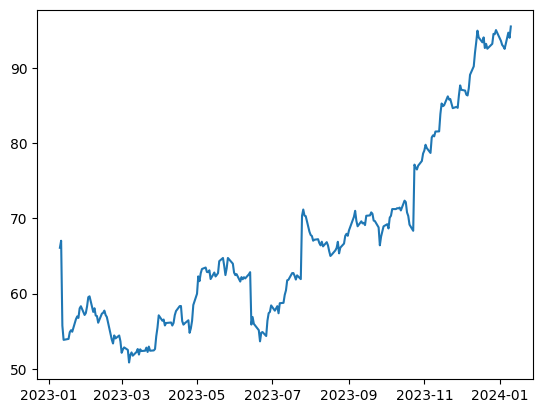

In [153]:
logitech = closing_price('LOGI')
print(logitech)
plt.plot(logitech['Adj Close'])
plt.show()

ny kode

In [154]:
train_data = logitech
test_data = logitech

In [155]:
features = ['Open', 'Volume']
target = 'Close'

In [165]:
close = np.array(train_data[features])

close_normalizer = layers.Normalization(axis=-1)
close_normalizer.adapt(close)

In [166]:
model = tf.keras.Sequential([
    close_normalizer,
    layers.Dense(units=1)
])

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_9 (Normaliza  (None, 2)                 5         
 tion)                                                           
                                                                 
 dense_22 (Dense)            (None, 1)                 3         
                                                                 
Total params: 8 (36.00 Byte)
Trainable params: 3 (12.00 Byte)
Non-trainable params: 5 (24.00 Byte)
_________________________________________________________________


In [167]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error')

In [168]:
%%time
history = model.fit(
    train_data[features],
    train_data[target],
    epochs=100,
    verbose=0,
    validation_split = 0.1
)

CPU times: user 4.74 s, sys: 174 ms, total: 4.92 s
Wall time: 4.69 s


der kan printes ud for at se alt data der vil komme fra predictions

In [170]:
predictions = model.predict(test_data[features])

8/8 [==============================] - 0s 4ms/step


der kan også printes ud har for at se mere om dataen

In [171]:
test_data[target]

Date
2023-01-10    67.199997
2023-01-11    68.150002
2023-01-12    56.660000
2023-01-13    54.740002
2023-01-17    54.869999
                ...    
2024-01-04    92.879997
2024-01-05    92.559998
2024-01-08    94.720001
2024-01-09    94.029999
2024-01-10    95.540001
Name: Close, Length: 252, dtype: float64

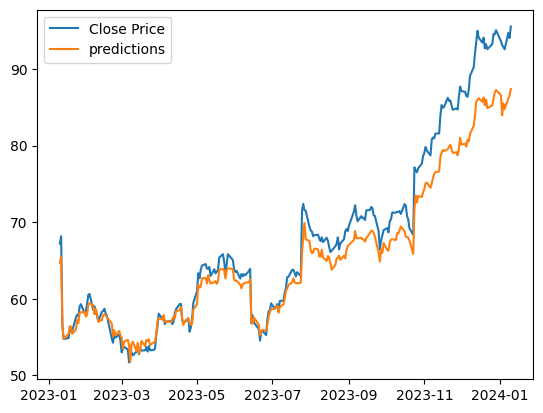

In [172]:
plt.plot(logitech['Close'], label = 'Close Price')
plt.plot(test_data[target].index, predictions, label = 'predictions')
plt.legend()
plt.show()

















hej

